In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('AAPL.csv')

In [3]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.099058,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093890,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086999,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089152,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091737,73449600
...,...,...,...,...,...,...,...
10991,2024-07-22,227.009995,227.779999,223.089996,223.960007,223.960007,48201800
10992,2024-07-23,224.369995,226.940002,222.679993,225.009995,225.009995,39960300
10993,2024-07-24,224.000000,224.800003,217.130005,218.539993,218.539993,61777600
10994,2024-07-25,218.929993,220.850006,214.619995,217.490005,217.490005,51391200


In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
df2 = df.reset_index()['Close']
df2.shape
df2 = df2[:2000]

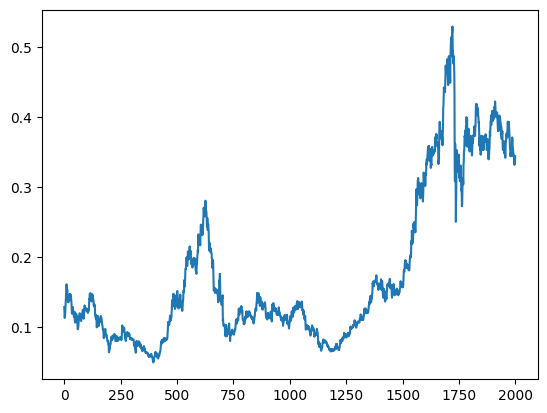

In [6]:
plt.plot(df2)

In [7]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

scaler=MinMaxScaler(feature_range=(0,1))
df2=scaler.fit_transform(np.array(df2).reshape(-1,1))

In [8]:
def create_dataset(df, time_step = 10):
    X, y = [], []
    for i in range(len(df)-time_step):
        df = np.array(df)
        X.append(df[i:(i+time_step)])
        y.append(df[i+time_step])
    return np.array(X), np.array(y)

In [9]:
X, y = create_dataset(df2, time_step = 100)

split_fraction = 0.8
split_index = int(split_fraction * len(X))

X_train = X[:split_index]
X_test = X[split_index:]

y_train = y[:split_index]
y_test = y[split_index:]

In [10]:
X_train.shape

(1520, 100, 1)

In [11]:
y_train.shape

(1520, 1)

In [12]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [14]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100,1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

C:\Users\shive\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [15]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 50)             │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=80, batch_size=64, verbose=1)

Epoch 1/80
24/24 ━━━━━━━━━━━━━━━━━━━━ 7s 137ms/step - loss: 0.0129 - val_loss: 0.0061
Epoch 2/80
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 100ms/step - loss: 9.8847e-04 - val_loss: 0.0075
Epoch 3/80
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 93ms/step - loss: 6.7285e-04 - val_loss: 0.0049
Epoch 4/80
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 91ms/step - loss: 6.2967e-04 - val_loss: 0.0042
Epoch 5/80
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 93ms/step - loss: 5.5650e-04 - val_loss: 0.0042
Epoch 6/80
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 91ms/step - loss: 4.7364e-04 - val_loss: 0.0045
Epoch 7/80
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 78ms/step - loss: 4.7621e-04 - val_loss: 0.0056
Epoch 8/80
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 86ms/step - loss: 5.4212e-04 - val_loss: 0.0065
Epoch 9/80
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 85ms/step - loss: 5.0505e-04 - val_loss: 0.0038
Epoch 10/80
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 91ms/step - loss: 4.1166e-04 - val_loss: 0.0040
Epoch 11/80
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 89ms/step - loss: 3.9468e-04 - val_loss: 0.0039
Epoch 12/80
24/24 ━━━

In [17]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step


In [18]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [19]:
import math
from sklearn.metrics import mean_squared_error

math.sqrt(mean_squared_error(y_train, train_predict))

0.07457259485928995

In [20]:
math.sqrt(mean_squared_error(y_test, test_predict))

0.31469378827180944

In [21]:
print(train_predict.shape), print(test_predict.shape), print(df2.shape)

(1520, 1)
(380, 1)
(2000, 1)


(None, None, None)

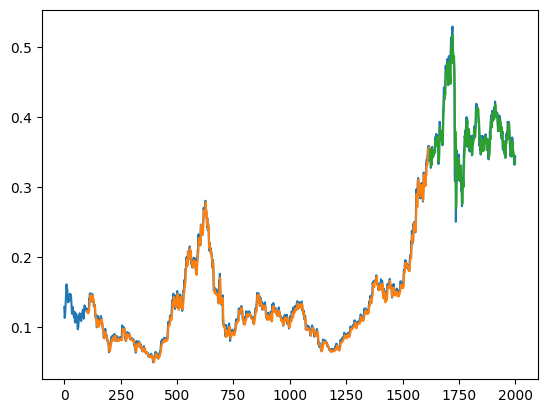

In [22]:
look_back=100
trainPredictPlot = np.empty_like(df2)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df2)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back):len(df2), :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df2))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

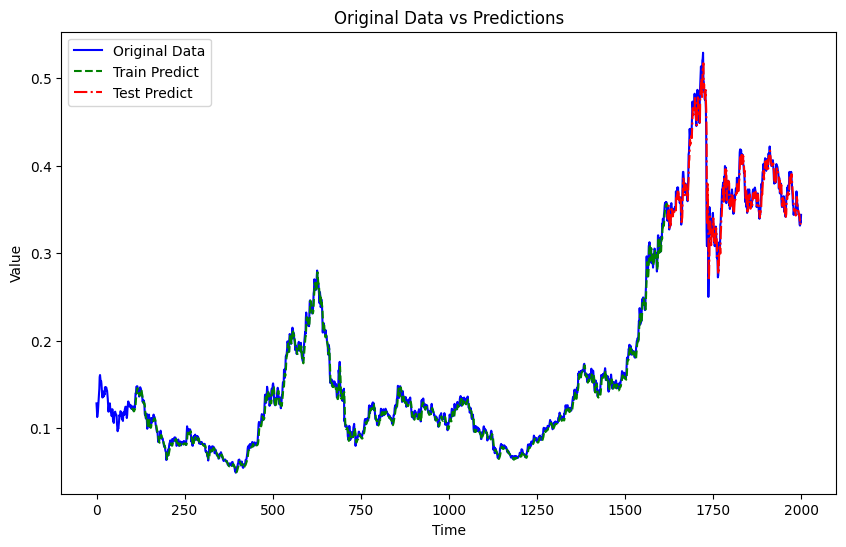

In [23]:
import numpy as np
import matplotlib.pyplot as plt

look_back = 100

trainPredictPlot = np.full(df2.shape, np.nan) 
trainPredictPlot[look_back:len(train_predict) + look_back, :] = train_predict

testPredictPlot = np.full(df2.shape, np.nan)
testPredictPlot[len(train_predict) + look_back:len(df2), :] = test_predict

plt.figure(figsize=(10, 6))
plt.plot(scaler.inverse_transform(df2), label='Original Data', color='blue', linestyle='-', linewidth=1.5)
plt.plot(trainPredictPlot, label='Train Predict', color='green', linestyle='--', linewidth=1.5)
plt.plot(testPredictPlot, label='Test Predict', color='red', linestyle='-.', linewidth=1.5)

plt.legend()

plt.title('Original Data vs Predictions')
plt.xlabel('Time')
plt.ylabel('Value')

plt.show()

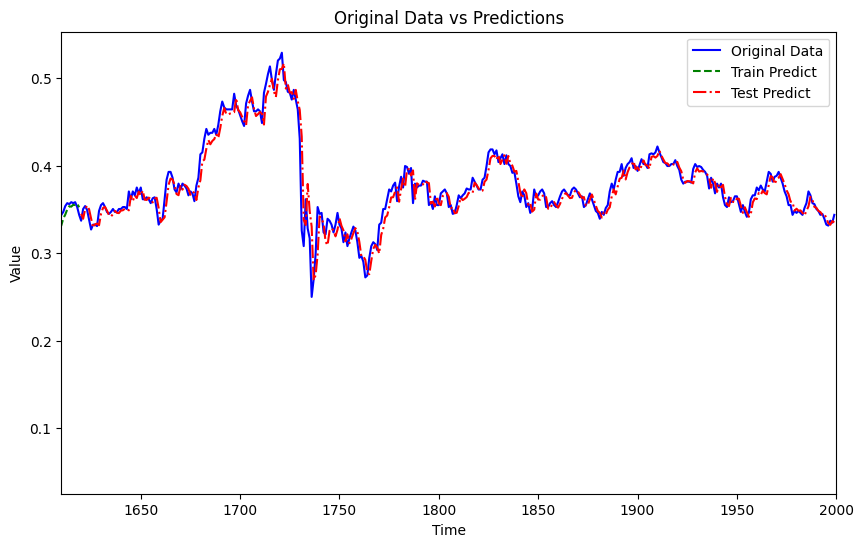

In [24]:
look_back = 100

trainPredictPlot = np.full(df2.shape, np.nan) 
trainPredictPlot[look_back:len(train_predict) + look_back, :] = train_predict

testPredictPlot = np.full(df2.shape, np.nan)
testPredictPlot[len(train_predict) + look_back:len(df2), :] = test_predict

plt.figure(figsize=(10, 6))
plt.plot(scaler.inverse_transform(df2), label='Original Data', color='blue', linestyle='-', linewidth=1.5)
plt.plot(trainPredictPlot, label='Train Predict', color='green', linestyle='--', linewidth=1.5)
plt.plot(testPredictPlot, label='Test Predict', color='red', linestyle='-.', linewidth=1.5)

plt.legend()

plt.title('Original Data vs Predictions')
plt.xlabel('Time')
plt.ylabel('Value')

plt.xlim([len(train_predict) + look_back - 10, len(df2)])
plt.show()

In [25]:
##splitting dataset into train and test split
training_size=int(len(df2)*0.65)
test_size=len(df2)-training_size
train_data,test_data=df2[0:training_size,:],df2[training_size:len(df2),:1]

In [45]:
import numpy as np

# Assuming `test_data` is already defined and contains your data
# Initialize with part of your data
x_input = test_data[341:].reshape(1, -1)
x_input = x_input[0]  # Flatten the array to 1D

temp_input = x_input.tolist()

from numpy import array

lst_output = []
n_steps = 100
i = 0

while i < 30:
    if len(temp_input) > 100:
        x_input = np.array(temp_input[-n_steps:])
        print("{} day input {}".format(i, x_input))
        x_input = x_input.reshape((1, n_steps, 1))  # Reshape to (1, n_steps, 1)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i, yhat))
        temp_input.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i += 1
    else:
        x_input = np.array(temp_input).reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i += 1

print(lst_output)


0 day input [0.71860407 0.73255875 0.74651133 0.73488418 0.73488418 0.72558037
 0.75813849 0.760466   0.75813849 0.76279143 0.77674402 0.76279143
 0.75116219 0.73953504 0.73720961 0.73023331 0.73023331 0.73488418
 0.73488418 0.7441859  0.73023331 0.72092951 0.69767519 0.68837139
 0.69302225 0.69302225 0.69302225 0.69069682 0.72325494 0.73488418
 0.72790788 0.73023331 0.72790788 0.72092951 0.71627864 0.70697692
 0.67674423 0.70232606 0.68837139 0.66511707 0.68837139 0.67906966
 0.68837139 0.65581327 0.63720982 0.63255895 0.65581327 0.64418611
 0.64651154 0.6581387  0.6581387  0.63953525 0.62092971 0.63720982
 0.62092971 0.60930256 0.61860428 0.6511624  0.66046413 0.66046413
 0.67906966 0.67209337 0.68372052 0.6744188  0.66976794 0.69302225
 0.71627864 0.71162778 0.69302225 0.70465149 0.70697692 0.71627864
 0.70232606 0.68837139 0.66976794 0.6581387  0.63720982 0.63720982
 0.61395342 0.62325515 0.61860428 0.62325515 0.61860428 0.61395342
 0.63023352 0.64186068 0.66976794 0.66046413 0.641

In [46]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [47]:
len(df2)

2000

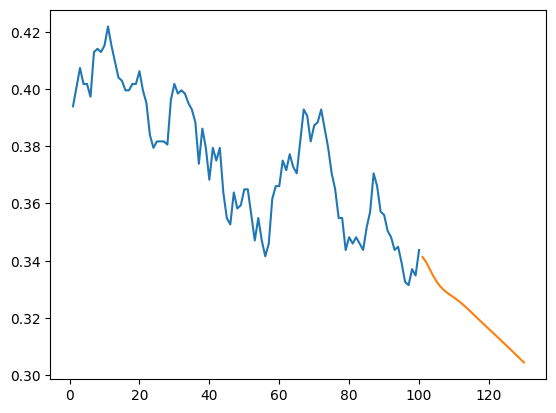

In [48]:
import matplotlib.pyplot as plt

plt.plot(day_new,scaler.inverse_transform(df2[1900:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

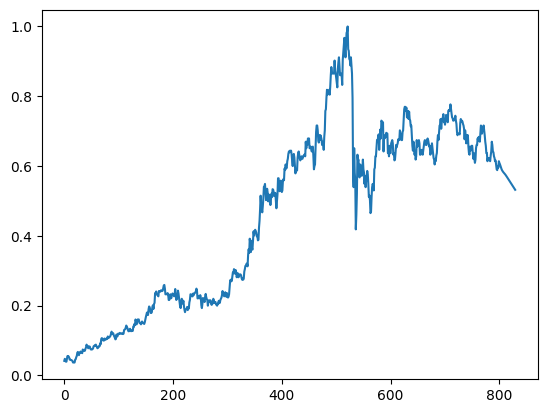

In [49]:
df3=df2.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [50]:
df3=scaler.inverse_transform(df3).tolist()

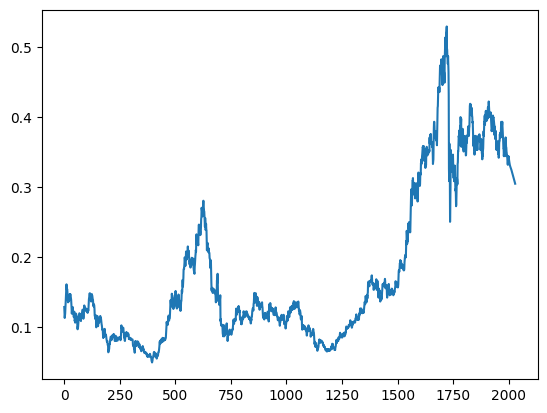

In [51]:
plt.plot(df3)